In [1]:
!pip install opencv-python

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import cv2

# Loading Datasets

In [3]:
from sklearn.datasets import load_digits
dataset = load_digits()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
dataset['data'].shape  # 1797 is the digits and it represents rows (flatten) , columns is 64(8x8) ~ 64 pixels

(1797, 64)

In [6]:
dataset['data'][:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
dataset['target'].shape

(1797,)

In [8]:
dataset['target'][:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
dataset['target_names'].shape

(10,)

In [10]:
dataset['images'].shape

(1797, 8, 8)

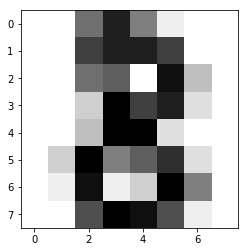

In [11]:
plt.imshow(dataset['images'][8] , cmap = 'gray_r')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset['data'],dataset['target'],random_state = 0)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


# APPLYING KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [15]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
x_new = x_test[0]
x_new

array([ 0.,  0., 11., 16., 15.,  3.,  0.,  0.,  0.,  5., 16., 12., 11.,
       13.,  0.,  0.,  0.,  3., 13.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
        0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
        0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
       16., 11.,  1.,  0.,  0.,  0., 13., 13.,  8., 13., 16.,  8.])

In [17]:
print(x_new.shape)

(64,)


In [18]:
x_new = x_new.reshape(1,-1)
x_new

array([[ 0.,  0., 11., 16., 15.,  3.,  0.,  0.,  0.,  5., 16., 12., 11.,
        13.,  0.,  0.,  0.,  3., 13.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
         0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        16., 11.,  1.,  0.,  0.,  0., 13., 13.,  8., 13., 16.,  8.]])

In [19]:
print(x_new.shape)

(1, 64)


In [20]:
prediction = knn.predict(x_new)
prediction

array([2])

In [21]:
print(y_test[0])

2


In [22]:
y_pred = knn.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       3, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 3, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [23]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [24]:
np.mean(y_pred == y_test ) * 100  # accuracy 

99.11111111111111

In [25]:
knn.score(x_test,y_test)

0.9911111111111112

# Applying Neural Nets and CNN to MNIST Data

for k in range(1,30):
    KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    accuracy = knn.score(x_test,y_test)
    print(f'if  k in {k} then accuracy is {accuracy} ')
    

In [49]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [51]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


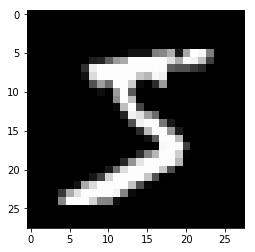

In [52]:
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [31]:
print(y_train[0])

5


# NUERAL NETS

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [54]:
# reshaping data to fit data into neural nets

In [58]:
m_train = x_train.shape[0]
m_test = x_test.shape[0]

X_train = x_train.reshape(m_train,-1)
X_test = x_test.reshape(m_test,-1)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [65]:
Y_train = np_utils.to_categorical(y_train)
print(Y_train.shape)

(60000, 10)


In [66]:
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [64]:
Y_test = np_utils.to_categorical(y_test)
print(Y_test.shape)

(10000, 10)


In [67]:
print(Y_test[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [68]:
model = Sequential()
model.add(Dense(20, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_9 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
activation_10 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
activation_11 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
__________

In [69]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
model.fit(X_train, Y_train, 
          batch_size=16, nb_epoch=20, 
          verbose=2, 
          validation_data=(X_test, Y_test))

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 19s - loss: 1.2481 - acc: 0.7534 - val_loss: 0.4496 - val_acc: 0.8816
Epoch 2/20
 - 17s - loss: 0.4347 - acc: 0.8852 - val_loss: 0.3696 - val_acc: 0.9010
Epoch 3/20
 - 18s - loss: 0.3596 - acc: 0.9015 - val_loss: 0.3221 - val_acc: 0.9133
Epoch 4/20
 - 18s - loss: 0.3165 - acc: 0.9126 - val_loss: 0.3012 - val_acc: 0.9211
Epoch 5/20
 - 17s - loss: 0.2898 - acc: 0.9202 - val_loss: 0.3105 - val_acc: 0.9203
Epoch 6/20
 - 17s - loss: 0.2727 - acc: 0.9248 - val_loss: 0.2850 - val_acc: 0.9253
Epoch 7/20
 - 16s - loss: 0.2553 - acc: 0.9294 - val_loss: 0.2684 - val_acc: 0.9291
Epoch 8/20
 - 16s - loss: 0.2415 - acc: 0.9327 - val_loss: 0.2672 - val_acc: 0.9272
Epoch 9/20
 - 16s - loss: 0.2286 - acc: 0.9356 - val_loss: 0.2552 - val_acc: 0.9327
Epoch 10/20
 - 16s - loss: 0.2160 - acc: 0.9383 - val_loss: 0.2191 - val_acc: 0.9376
Epoch 11/20
 - 16s - loss: 0.2089 - acc: 0.9416 - val_loss: 0.2166 - val_acc: 0.9399
Epoch 12/20
 - 16s - los

In [ ]:
# accuracy in Neural nets can be improved by applying CNN

# APPLYING CNN TO IMPROVE ACCURACY

In [76]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [77]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [72]:
# in cnn dimensions will include no of channels also so we will reshape it
X_train = x_train.reshape(-1,28,28,1)
X_test = x_test.reshape(-1,28,28,1)

In [73]:
print(X_train.shape)

(60000, 28, 28, 1)


In [34]:
print(X_test.shape)

(10000, 28, 28, 1)


In [35]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [36]:
print(Y_train.shape)

(60000, 10)


In [37]:
print(Y_test.shape)

(10000, 10)


In [38]:
print(Y_train[:20])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [39]:
X_train = X_train[:3600]
Y_train = Y_train[:3600]
X_test = X_test[:900]
Y_test = Y_test[:900]
# only purpose to do it to run it fast else for all the samples it takes a lot of time to run

In [40]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3600, 28, 28, 1)
(3600, 10)
(900, 28, 28, 1)
(900, 10)


In [43]:
from keras.layers import Dense,Activation,Flatten
from keras.layers import Dropout,Convolution2D,MaxPooling2D
from keras.models import Sequential

In [ ]:
# dropout - used to regularise


In [45]:
model = Sequential()
#(m,28,28,1)
model.add(Convolution2D(32,3,3,input_shape = (28,28,1)))
model.add(Activation('relu'))

# (m,26,26,32)

model.add(Convolution2D(64,3,3))
model.add(Activation('relu'))

# (m,24,24,64)

model.add(MaxPooling2D(pool_size=(2,2)))

#(m,12,12,64)
model.add(Convolution2D(16,3,3))
model.add(Activation('relu'))

#(m,10,10,16)
model.add(Flatten())
#(m,1600) # 1600  features for 1 image

# Regularization
model.add(Dropout(.25))

model.add(Dense(10))
model.add(Activation('softmax'))

#(m,10)
model.summary()

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  app.launch_new_instance()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 16)        0         
__________

In [46]:
model.compile( loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'] )

In [47]:
model.fit(X_train,Y_train,
         validation_data = (X_test , Y_test),
          nb_epoch=12,
          batch_size=16,
          verbose = 2)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 3600 samples, validate on 900 samples
Epoch 1/12
 - 38s - loss: 1.9919 - acc: 0.6464 - val_loss: 0.4108 - val_acc: 0.8756
Epoch 2/12
 - 34s - loss: 0.3364 - acc: 0.9006 - val_loss: 0.3004 - val_acc: 0.8956
Epoch 3/12
 - 35s - loss: 0.2118 - acc: 0.9364 - val_loss: 0.2363 - val_acc: 0.9211
Epoch 4/12
 - 34s - loss: 0.1547 - acc: 0.9522 - val_loss: 0.1685 - val_acc: 0.9478
Epoch 5/12
 - 37s - loss: 0.1338 - acc: 0.9606 - val_loss: 0.1710 - val_acc: 0.9389
Epoch 6/12
 - 35s - loss: 0.0806 - acc: 0.9744 - val_loss: 0.2075 - val_acc: 0.9389
Epoch 7/12
 - 34s - loss: 0.0774 - acc: 0.9750 - val_loss: 0.1584 - val_acc: 0.9489
Epoch 8/12
 - 36s - loss: 0.0494 - acc: 0.9831 - val_loss: 0.2332 - val_acc: 0.9289
Epoch 9/12
 - 36s - loss: 0.0655 - acc: 0.9775 - val_loss: 0.2595 - val_acc: 0.9300
Epoch 10/12
 - 34s - loss: 0.0520 - acc: 0.9853 - val_loss: 0.1864 - val_acc: 0.9478
Epoch 11/12
 - 34s - loss: 0.0431 - acc: 0.9867 - val_loss: 0.1630 - val_acc: 0.9533
Epoch 12/12
 - 34s - loss: 

In [48]:
# Accuracy is improved using CNN it increases a lot as in comparison to KNN and nueral nets